In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

plt.style.use('seaborn-colorblind')

In [2]:
ohio = pd.read_csv('sample_data/ohio-history.csv')
new_mexico = pd.read_csv('sample_data/new-mexico-history.csv')

In [3]:
ohio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              368 non-null    object 
 1   state                             368 non-null    object 
 2   death                             353 non-null    float64
 3   deathConfirmed                    332 non-null    float64
 4   deathIncrease                     368 non-null    int64  
 5   deathProbable                     332 non-null    float64
 6   hospitalized                      352 non-null    float64
 7   hospitalizedCumulative            352 non-null    float64
 8   hospitalizedCurrently             310 non-null    float64
 9   hospitalizedIncrease              368 non-null    int64  
 10  inIcuCumulative                   348 non-null    float64
 11  inIcuCurrently                    310 non-null    float64
 12  negative

In [4]:
new_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              368 non-null    object 
 1   state                             368 non-null    object 
 2   death                             349 non-null    float64
 3   deathConfirmed                    0 non-null      float64
 4   deathIncrease                     368 non-null    int64  
 5   deathProbable                     0 non-null      float64
 6   hospitalized                      329 non-null    float64
 7   hospitalizedCumulative            329 non-null    float64
 8   hospitalizedCurrently             346 non-null    float64
 9   hospitalizedIncrease              368 non-null    int64  
 10  inIcuCumulative                   0 non-null      float64
 11  inIcuCurrently                    0 non-null      float64
 12  negative

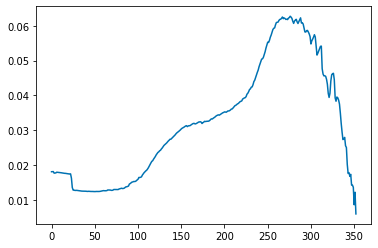

In [5]:
ohio['ratio'] = (ohio['death'] / ohio['positive'])
ohio['ratio'].plot()

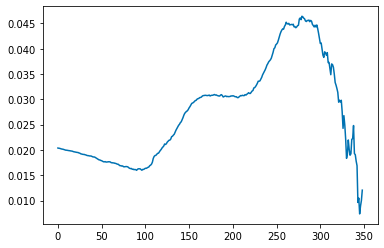

In [6]:
new_mexico['ratio'] = (new_mexico['death'] / new_mexico['positive'])
new_mexico['ratio'].plot()

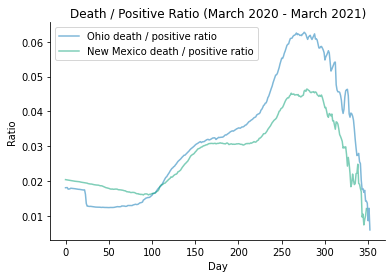

In [21]:
fig = plt.figure()
plt.plot(ohio['ratio'], label='Ohio death / positive ratio', alpha=0.5)
plt.plot(new_mexico['ratio'], label='New Mexico death / positive ratio', alpha=0.5)
plt.title('Death / Positive Ratio (March 2020 - March 2021)')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()

In [11]:
new_df = np.concatenate((ohio['ratio'], new_mexico['ratio']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


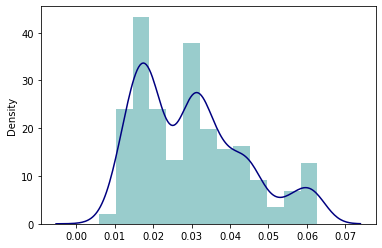

In [12]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(new_df, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


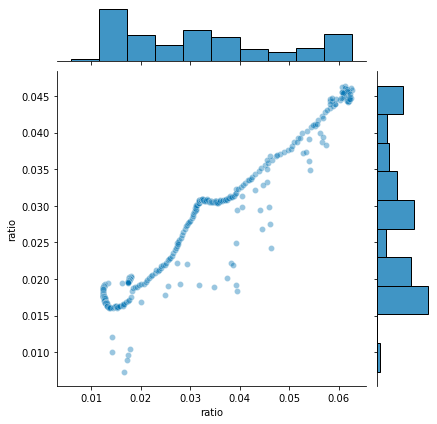

In [13]:
sns.jointplot(ohio['ratio'], new_mexico['ratio'], alpha=0.4)